<a href="https://colab.research.google.com/github/dianageorgieva2/HBO/blob/main/HBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HBO 2023 Analyses

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import textwrap
import matplotlib.ticker as ticker

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
stats_2023 = pd.read_csv('/content/Statistika_na_uspewaemostta_BEL_MAT.csv')
stats_2022 = pd.read_csv('//content/statistika_mat_bel_2022.csv')

In [ ]:
# stats_2023.info()
# stats_2023.shape
# stats_2023

STATS 2023 cleanup

In [7]:
stats_2023_clean = stats_2023.rename(columns={
                           "Статистика за успеваемостта, НВО 7. клас": "Категория точки",
                           "Unnamed: 1": "БЕЛ",
                           "Unnamed: 3": "БЕЛ_м",
                           "Unnamed: 5": "БЕЛ_ж",
                           "Unnamed: 7": "МАТ",
                           "Unnamed: 9": "МАТ_м",
                           "Unnamed: 11": "МАТ_ж",
                           "Unnamed: 13": "общо",
                           "Unnamed: 15": "общо_м",
                           "Unnamed: 17": "общо_ж"})
stats_2023_clean = stats_2023_clean.drop(['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6',  'Unnamed: 8', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
stats_2023_clean = stats_2023_clean.drop([0, 1, 2], axis=0)
stats_2023_clean = stats_2023_clean.fillna(0)
stats_2023_clean[['общо', 'общо_м', 'общо_ж', 'МАТ', 'МАТ_м', 'МАТ_ж', 'БЕЛ', 'БЕЛ_м', 'БЕЛ_ж']] = stats_2023_clean[['общо', 'общо_м', 'общо_ж', 'МАТ', 'МАТ_м', 'МАТ_ж', 'БЕЛ', 'БЕЛ_м', 'БЕЛ_ж']].astype(int)
stats_2023_clean.reset_index(drop=True, inplace=True)
stats_2023_clean["ТОЧКИ"] = pd.Series(np.arange(0,201,0.5))
stats_2023_clean["Година"] = "2023"

STATS 2022 Clean up

In [8]:
stats_2022_clean = stats_2022.rename(columns={
                           "Статистика за успеваемостта, НВО 7. клас, 2022 г.": "Категория точки",
                           "Unnamed: 1": "БЕЛ",
                           "Unnamed: 3": "БЕЛ_м",
                           "Unnamed: 5": "БЕЛ_ж",
                           "Unnamed: 7": "МАТ",
                           "Unnamed: 9": "МАТ_м",
                           "Unnamed: 11": "МАТ_ж",
                           "Unnamed: 13": "общо",
                           "Unnamed: 15": "общо_м",
                           "Unnamed: 17": "общо_ж"})
stats_2022_clean = stats_2022_clean.drop(['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6',  'Unnamed: 8', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'], axis=1)
stats_2022_clean = stats_2022_clean.drop([0, 1, 2], axis=0)
stats_2022_clean = stats_2022_clean.fillna(0)
stats_2022_clean[['общо', 'общо_м', 'общо_ж', 'МАТ', 'МАТ_м', 'МАТ_ж', 'БЕЛ', 'БЕЛ_м', 'БЕЛ_ж']] = stats_2022_clean[['общо', 'общо_м', 'общо_ж', 'МАТ', 'МАТ_м', 'МАТ_ж', 'БЕЛ', 'БЕЛ_м', 'БЕЛ_ж']].astype(int)
stats_2022_clean.reset_index(drop=True, inplace=True)
stats_2022_clean["ТОЧКИ"] = pd.Series(np.arange(0,201,0.5))
stats_2022_clean["Година"] = "2022"

Analyses BY YEAR

In [ ]:
# plt.figure(figsize=(8,4), dpi=200)
# sns.scatterplot(data=stats_2023_clean,
#             x=stats_2023_clean.ТОЧКИ,
#             y=stats_2023_clean.общо_м,
#             color='red',
#             label=2023)
# plt.plot(stats_2022_clean.ТОЧКИ, stats_2022_clean.общо_м, color="blue", linewidth=.5, label=2022)
# plt.locator_params(nbins=20)
# plt.xticks(rotation=90, fontsize=6)
# plt.yticks(fontsize=6)
# plt.xlabel('Точки', fontsize=10)
# plt.ylabel('Ученици(м)', fontsize=10)
# plt.legend()


In [ ]:
# stats_2023_clean.columns += '_2023'
# stats_2022_clean.columns += '_2022'
# df_combined = pd.concat([stats_2023_clean, stats_2022_clean], axis=1)
# df_combined


In [ ]:
# df_combined
# f, axes = plt.subplots(1, 2)
# sns.regplot(data=df_combined,
#           x=df_combined["ТОЧКИ_2023"],
#           y=df_combined["общо_м_2023"],
#           lowess=True,
#           scatter_kws={"alpha": 0.1},
#           line_kws={"color": "black",},
#           ax=axes[0]
#           )
# sns.regplot(data=df_combined,
#           x=df_combined.ТОЧКИ_2022,
#           y=df_combined.общо_м_2022,
#           lowess=True,
#           scatter_kws={"alpha": 0.1},
#           line_kws={"color": "black",},
#           ax=axes[1]
#           )
# plt.show()

In [ ]:
# plt.figure(figsize=(8,4), dpi=200)
# sns.relplot(
#     data=df_combined,
#     x="ТОЧКИ_2023", y="общо_м_2023",
#     height=4, aspect=4, kind="line"
# )

In [10]:
df_combined_2 = pd.concat([stats_2023_clean, stats_2022_clean], axis=0)


In [ ]:
# plt.figure(figsize=(8,4), dpi=200)
# plt.style.use('seaborn-deep')
# sns.barplot(data=df_combined_2, x="ТОЧКИ", y="общо_м", hue="Година", dodge=True)
# plt.legend(loc='upper right')
# plt.show()

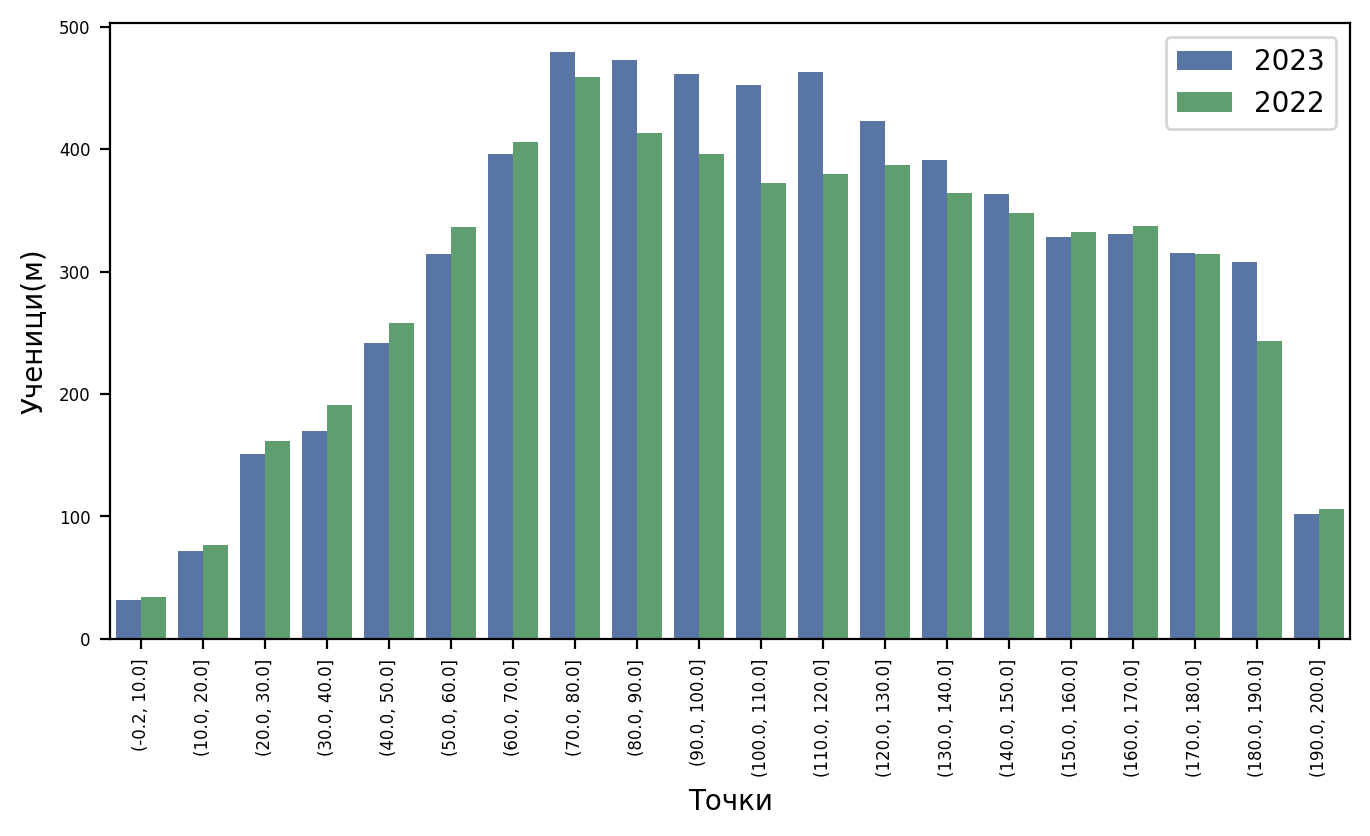

In [ ]:
# plt.figure(figsize=(8,4), dpi=200)
# df_combined_2['Bin'] = pd.cut(df_combined_2.ТОЧКИ, bins=20).astype("str")
# # df_combined_2['Bin'] = np.linspace(0, 200, num = 20)
# sns.barplot(data=df_combined_2, x="Bin", y="общо_м", hue="Година", estimator='sum', errorbar=None)
# plt.xticks(rotation=90, fontsize=6)
# plt.yticks(fontsize=6)
# plt.xlabel('Точки', fontsize=10)
# plt.ylabel('Ученици(м)', fontsize=10)
# plt.legend()

Text(0.5, 1.0, '2023(м)      ученици: 6266     ср.успех: 108.97\n2022(м)      ученици: 5915     ср.успех: 107.42')

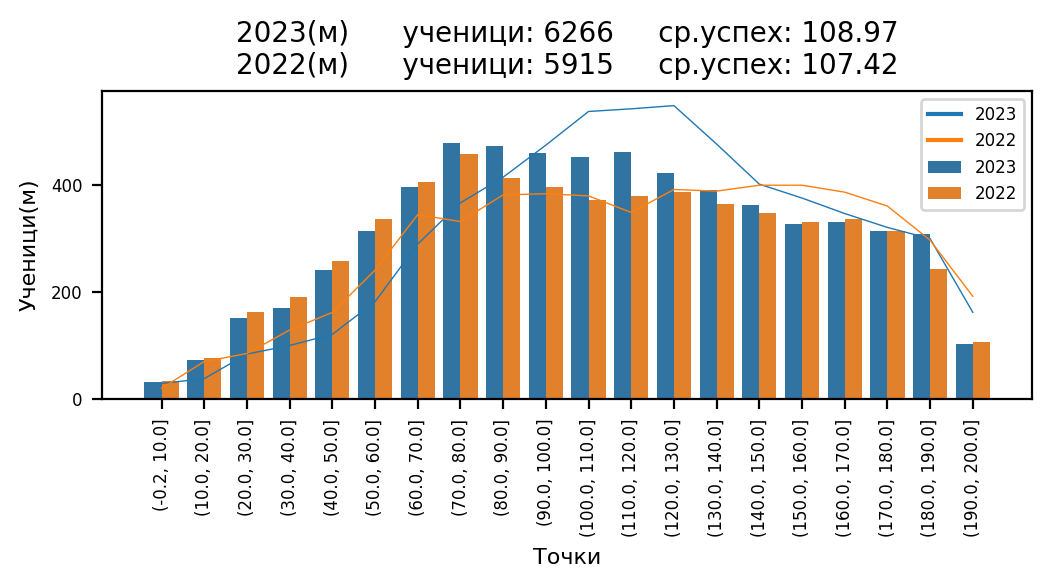

In [11]:
plt.figure(figsize=(6,2), dpi=200)
# df_combined_2[df_combined_2["Година"] == "2023"]

df_combined_2['Bin'] = pd.cut(df_combined_2.ТОЧКИ, bins=20)
sns.barplot(data=df_combined_2,
                  x=df_combined_2["Bin"].astype(str),
                  y="общо_м",
                  hue="Година",
                  estimator='sum',
                  errorbar=None)
sns.lineplot(data=df_combined_2,
                   x=df_combined_2["Bin"].astype(str),
                   y="общо_ж",
                   hue="Година",
                   linewidth=.5,
                   estimator='sum',
                   errorbar=None)
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('Точки', fontsize=8)
plt.ylabel('Ученици(м)', fontsize=8)
plt.legend(fontsize=6)

avg_br_m_2023 = df_combined_2[df_combined_2["Година"] == "2023"].общо_м.sum()
avg_tochki_m_2023 = sum(df_combined_2[df_combined_2["Година"] == "2023"].общо_м * df_combined_2[df_combined_2["Година"] == "2023"].ТОЧКИ)/avg_br_m_2023
avg_br_m_2022 = df_combined_2[df_combined_2["Година"] == "2022"].общо_м.sum()
avg_tochki_m_2022 = sum(df_combined_2[df_combined_2["Година"] == "2022"].общо_м * df_combined_2[df_combined_2["Година"] == "2022"].ТОЧКИ)/avg_br_m_2022

plt.title(f"2023(м)      ученици: {avg_br_m_2023}     ср.успех: {avg_tochki_m_2023.round(2)}\n2022(м)      ученици: {avg_br_m_2022}     ср.успех: {avg_tochki_m_2022.round(2)}", fontsize=10)


# КЛАСИРАНЕ
**Data Cleaning**

In [31]:
klasirane_2022_1 = pd.read_csv('/content/min_max_1_etap_2022_2.csv')
klasirane_2022_2 = pd.read_csv('/content/min_max_2_etap_2022.csv')
klasirane_2022_3 = pd.read_csv('/content/min_max_3_etap_2022.csv')
mesta_2022_3 = pd.read_csv('/content/free_3 etap_2022.csv')
klasirane_2023_1 = pd.read_csv('/content/min_maх_1_etap_2023.csv')
klasirane_2023_2 = pd.read_csv('/content/min_max_2_etap_2023.csv')

In [13]:
klasirane_2022_1_clean = klasirane_2022_1.rename(columns={
                           "Unnamed: 1": "Код училище",
                           "Unnamed: 2": "Училище",
                           "Unnamed: 3": "Код паралелка",
                           "Unnamed: 4": "Паралелка",
                           "Unnamed: 5": "Мин_бал_о",
                           "Unnamed: 6": "Мин_бал_м",
                           "Unnamed: 7": "Мин_бал_ж",
                           "Unnamed: 8": "Макс_бал_о",
                           "Unnamed: 9": "Макс_бал_м",
                           "Unnamed: 10": "Макс_бал_ж"})
klasirane_2022_1_clean = klasirane_2022_1_clean.drop('СПРАВКА\nза минималния и максималния бал по паралелки\nв РУО СОФИЯ-ГРАД\nКъм дата 11.07.2022\n', axis=1)
klasirane_2022_1_clean = klasirane_2022_1_clean.drop([0, 1, 2, 3], axis=0)
klasirane_2022_1_clean = klasirane_2022_1_clean[klasirane_2022_1_clean["Код паралелка"].notna()]
klasirane_2022_1_clean = klasirane_2022_1_clean.fillna(0)
klasirane_2022_1_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']] = klasirane_2022_1_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']].astype(float)
klasirane_2022_1_clean.reset_index(drop=True, inplace=True)
klasirane_2022_1_clean["Класиране"] = 1
klasirane_2022_1_clean["Година"] = "2022"
klasirane_2022_1_clean = klasirane_2022_1_clean.sort_values(by='Мин_бал_м', ascending=False)

In [14]:
klasirane_2022_2_clean = klasirane_2022_2.rename(columns={
                           "Unnamed: 1": "Код училище",
                           "Unnamed: 2": "Училище",
                           "Unnamed: 3": "Код паралелка",
                           "Unnamed: 4": "Паралелка",
                           "Unnamed: 5": "Мин_бал_о",
                           "Unnamed: 6": "Мин_бал_м",
                           "Unnamed: 7": "Мин_бал_ж",
                           "Unnamed: 8": "Макс_бал_о",
                           "Unnamed: 9": "Макс_бал_м",
                           "Unnamed: 10": "Макс_бал_ж"})
klasirane_2022_2_clean = klasirane_2022_2_clean.drop('СПРАВКА\nза минималния и максималния бал по паралелки\nв РУО СОФИЯ-ГРАД\nКъм дата 19.07.2022 г.\n', axis=1)
klasirane_2022_2_clean = klasirane_2022_2_clean.drop([0, 1, 2, 3], axis=0)
klasirane_2022_2_clean = klasirane_2022_2_clean[klasirane_2022_2_clean["Код паралелка"].notna()]
klasirane_2022_2_clean = klasirane_2022_2_clean.fillna(0)
klasirane_2022_2_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']] = klasirane_2022_2_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']].astype(float)
klasirane_2022_2_clean.reset_index(drop=True, inplace=True)
klasirane_2022_2_clean["Класиране"] = 2
klasirane_2022_2_clean["Година"] = "2022"
klasirane_2022_2_clean = klasirane_2022_2_clean.sort_values(by='Мин_бал_м', ascending=False)

In [32]:
klasirane_2022_3_clean = klasirane_2022_3.rename(columns={
                           "Unnamed: 1": "Код училище",
                           "Unnamed: 2": "Училище",
                           "Unnamed: 3": "Код паралелка",
                           "Unnamed: 4": "Паралелка",
                           "Unnamed: 5": "Мин_бал_о",
                           "Unnamed: 6": "Мин_бал_м",
                           "Unnamed: 7": "Мин_бал_ж",
                           "Unnamed: 8": "Макс_бал_о",
                           "Unnamed: 9": "Макс_бал_м",
                           "Unnamed: 10": "Макс_бал_ж"})
klasirane_2022_3_clean = klasirane_2022_3_clean.drop('СПРАВКА\nза минималния и максималния бал по паралелки\nв РУО СОФИЯ-ГРАД\nКъм дата 29.07.2022 г.\n', axis=1)
klasirane_2022_3_clean = klasirane_2022_3_clean.drop([0, 1, 2, 3], axis=0)
klasirane_2022_3_clean = klasirane_2022_3_clean[klasirane_2022_3_clean["Код паралелка"].notna()]
klasirane_2022_3_clean = klasirane_2022_3_clean.fillna(0)
klasirane_2022_3_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']] = klasirane_2022_3_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']].astype(float)
klasirane_2022_3_clean.reset_index(drop=True, inplace=True)
klasirane_2022_3_clean["Класиране"] = 3
klasirane_2022_3_clean["Година"] = "2022"
klasirane_2022_3_clean = klasirane_2022_3_clean.sort_values(by='Мин_бал_м', ascending=False)

In [28]:
# mesta_2022_3_clean = mesta_2022_3.rename(columns={
#                            "Unnamed: 1": "Код училище",
#                            "Unnamed: 2": "Училище",
#                            "Unnamed: 3": "Код паралелка",
#                            "Unnamed: 4": "Паралелка",
#                            "Unnamed: 5": "Места_о",
#                            "Unnamed: 6": "Места_м",
#                            "Unnamed: 7": "Места_ж",})
# mesta_2022_3_clean = mesta_2022_3_clean.drop('СВОБОДНИ МЕСТА ЗА ТРЕТИ ЕТАП НА КЛАСИРАНЕ ПО ПАРАЛЕЛКИ С КОДОВЕ ПО УЧИЛИЩА, \nПРИЕМ В VIII КЛАС ЗА УЧЕБНАТА 2022/ 2023 ГОДИНА ', axis=1)
# mesta_2022_3_clean = mesta_2022_3_clean.drop([0, 1, 2, 3], axis=0)
# mesta_2022_3_clean = mesta_2022_3_clean[mesta_2022_3_clean["Код паралелка"].notna()]
# mesta_2022_3_clean = mesta_2022_3_clean.fillna(0)
# mesta_2022_3_clean[["Места_о", "Места_м", "Места_ж"]] = mesta_2022_3_clean[["Места_о", "Места_м", "Места_ж"]].astype(int)
# mesta_2022_3_clean.reset_index(drop=True, inplace=True)
# mesta_2022_3_clean["Класиране"] = 3
# mesta_2022_3_clean["Година"] = "2022"
# klasirane_2022_3_clean = pd.concat([klasirane_2022_3_clean, mesta_2022_3_clean], axis=1)
# klasirane_2022_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 1 to 378
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Код училище    379 non-null    object 
 1   Училище        379 non-null    object 
 2   Код паралелка  379 non-null    object 
 3   Паралелка      379 non-null    object 
 4   Мин_бал_о      379 non-null    float64
 5   Мин_бал_м      379 non-null    float64
 6   Мин_бал_ж      379 non-null    float64
 7   Макс_бал_о     379 non-null    float64
 8   Макс_бал_м     379 non-null    float64
 9   Макс_бал_ж     379 non-null    float64
 10  Класиране      379 non-null    int64  
 11  Година         379 non-null    object 
 12  Код училище    379 non-null    object 
 13  Училище        379 non-null    object 
 14  Код паралелка  379 non-null    object 
 15  Паралелка      379 non-null    object 
 16  Места_о        379 non-null    int64  
 17  Места_м        379 non-null    int64  
 18  Места_ж   

In [30]:
klasirane_2022_3_clean.head(10)

Код училище                                            Училище  \
1      2216306  Софийска математическа гимназия "Паисий Хиленд...   
6      2213350  Технологично училище "Електронни системи" към ...   
4      2211304  Национална природо-математическа гимназия "Ака...   
5      2204091  91.НЕМСКА ЕЗИКОВА ГИМНАЗИЯ Професор Константин...   
8      2216301                   Първа английска езикова гимназия   
9      2205407  СОФИЙСКА ПРОФЕСИОНАЛНА ГИМНАЗИЯ по ЕЛЕКТРОНИКА...   
12     2211419  СОФИЙСКА ГИМНАЗИЯ ПО СТРОИТЕЛСТВО, АРХИТЕКТУРА...   
13     2216164  164. гимназия с преподаване на испански език "...   
14     2205407  СОФИЙСКА ПРОФЕСИОНАЛНА ГИМНАЗИЯ по ЕЛЕКТРОНИКА...   
15     2211304  Национална природо-математическа гимназия "Ака...   

   Код паралелка                                        Паралелка  Мин_бал_о  \
1           3909  Математически (математика и физика) - НЕ (ИИЧЕ)     486.50   
6           2127                       Системно програмиране - АЕ     464.50   
4           0821                         Математически - НЕ М Инф     474.25   
5           2644                  Чужди езици - НЕ интензивно /АЕ     467.00   
8           0727                  Чужди езици - АЕ интензивно, НЕ     449.00   
9           2366                 Микропроцесорна техника - АЕ, НЕ     446.75   
12          0719                  Строителство и архитектура - АЕ     433.25   
13          2562                  Чужди езици - ИЕ интензивно, ФЕ     433.00   
14          2338                   Приложно програмиране - АЕ, НЕ     430.25   
15          0847                       Икономическо развитие - АЕ     430.00   

    Мин_бал_м  Мин_бал_ж  Макс_бал_о  Макс_бал_м  Макс_бал_ж  ...  Година  \
1      486.50       0.00      486.50      486.50        0.00  ...    2022   
6      479.25     464.50      479.25      479.25      464.50  ...    2022   
4      474.25       0.00      482.00      482.00        0.00  ...    2022   
5      467.00     467.00      469.50      469.50      467.50  ...    2022   
8      449.00       0.00      449.00      449.00        0.00  ...    2022   
9      446.75       0.00      446.75      446.75        0.00  ...    2022   
12     433.25       0.00      433.25      433.25        0.00  ...    2022   
13     433.00       0.00      433.00      433.00        0.00  ...    2022   
14     430.25       0.00      430.25      430.25        0.00  ...    2022   
15     430.00       0.00      430.00      430.00        0.00  ...    2022   

   Код училище                                 Училище Код паралелка  \
1      2216001   1 Средно училище "Пенчо П. Славейков"          1900   
6      2214101         101. СРЕДНО УЧИЛИЩЕ "БАЧО КИРО"          2886   
4      2213010    10 Средно училище " Теодор Траянов "          2101   
5      2213010    10 Средно училище " Теодор Траянов "          3075   
8      2214101         101. СРЕДНО УЧИЛИЩЕ "БАЧО КИРО"          2889   
9      2205105     105. СРЕДНО УЧИЛИЩЕ "АТАНАС ДАЛЧЕВ"          2543   
12     2207108  108 Средно училище "Никола Беловеждов"          3675   
13     2207108  108 Средно училище "Никола Беловеждов"          1852   
14     2206113                 113 СУ "САВА ФИЛАРЕТОВ"          1676   
15     2206113                 113 СУ "САВА ФИЛАРЕТОВ"          1648   

                                            Паралелка Места_о  Места_м  \
1   Природни науки - Биология и здравно образовани...       0        0   
6           Икономическо развитие - АЕ интензивно, НЕ       2        0   
4                               Обществени науки - АЕ       3        0   
5                                 Природни науки - АЕ       4        0   
8     Софтуерни и хардуерни науки - АЕ интензивно, НЕ       2        0   
9      Екскурзоводско обслужване - ИтЕ интензивно, АЕ       2        0   
12                Предприемачески - АЕ интензивно, НЕ       2        0   
13                Предприемачески - АЕ интензивно, РЕ       1        0   
14                           Продавач-консултант /АЕ/  

In [18]:
klasirane_2023_1_clean = klasirane_2023_1.rename(columns={
                           "Unnamed: 1": "Код училище",
                           "Unnamed: 2": "Училище",
                           "Unnamed: 3": "Код паралелка",
                           "Unnamed: 4": "Паралелка",
                           "Unnamed: 5": "Мин_бал_о",
                           "Unnamed: 6": "Мин_бал_м",
                           "Unnamed: 7": "Мин_бал_ж",
                           "Unnamed: 8": "Макс_бал_о",
                           "Unnamed: 9": "Макс_бал_м",
                           "Unnamed: 10": "Макс_бал_ж"})
klasirane_2023_1_clean = klasirane_2023_1_clean.drop('СПРАВКА\nза минималния и максималния бал по паралелки\nв РУО СОФИЯ-ГРАД\nКъм дата 12.07.2023 г.', axis=1)
klasirane_2023_1_clean = klasirane_2023_1_clean.drop([0, 1, 2, 3], axis=0)
klasirane_2023_1_clean = klasirane_2023_1_clean[klasirane_2023_1_clean["Код паралелка"].notna()]
klasirane_2023_1_clean = klasirane_2023_1_clean.fillna(0)
klasirane_2023_1_clean = klasirane_2023_1_clean.drop(klasirane_2023_1_clean[klasirane_2023_1_clean["Код паралелка"] == 0].index, axis=0)
klasirane_2023_1_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']] = klasirane_2023_1_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']].astype(float)
klasirane_2023_1_clean.reset_index(drop=True, inplace=True)
klasirane_2023_1_clean["Класиране"] = 1
klasirane_2023_1_clean["Година"] = "2023"
klasirane_2023_1_clean = klasirane_2023_1_clean.sort_values(by='Мин_бал_м', ascending=False)

In [19]:
klasirane_2023_2_clean = klasirane_2023_2.rename(columns={
                           "Unnamed: 1": "Код училище",
                           "Unnamed: 2": "Училище",
                           "Unnamed: 3": "Код паралелка",
                           "Unnamed: 4": "Паралелка",
                           "Unnamed: 6": "Мин_бал_о",
                           "Unnamed: 7": "Мин_бал_м",
                           "Unnamed: 8": "Мин_бал_ж",
                           "Unnamed: 9": "Макс_бал_о",
                           "Unnamed: 10": "Макс_бал_м",
                           "Unnamed: 11": "Макс_бал_ж"})
klasirane_2023_2_clean = klasirane_2023_2_clean.drop(['СПРАВКА\nза минималния и максималния бал по паралелки\nв РУО СОФИЯ-ГРАД\nКъм дата 19.07.2023 г.\n', "Unnamed: 5"], axis=1)
klasirane_2023_2_clean = klasirane_2023_2_clean.drop([0, 1, 2, 3], axis=0)
klasirane_2023_2_clean = klasirane_2023_2_clean[klasirane_2023_2_clean["Код паралелка"].notna()]
klasirane_2023_2_clean = klasirane_2023_2_clean.fillna(0)
klasirane_2023_2_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']] = klasirane_2023_2_clean[["Мин_бал_о", "Мин_бал_м", "Мин_бал_ж", 'Макс_бал_о', 'Макс_бал_м', 'Макс_бал_ж']].astype(float)
klasirane_2023_2_clean.reset_index(drop=True, inplace=True)
klasirane_2023_2_clean["Класиране"] = 2
klasirane_2023_2_clean["Година"] = "2023"
klasirane_2023_2_clean = klasirane_2023_2_clean.sort_values(by='Мин_бал_м', ascending=False)

In [33]:
klasirane_2022_combined = pd.concat([klasirane_2022_1_clean, klasirane_2022_2_clean, klasirane_2022_3_clean], axis=0)
klasirane_2022_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 378
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Код училище    1126 non-null   object 
 1   Училище        1126 non-null   object 
 2   Код паралелка  1126 non-null   object 
 3   Паралелка      1126 non-null   object 
 4   Мин_бал_о      1126 non-null   float64
 5   Мин_бал_м      1126 non-null   float64
 6   Мин_бал_ж      1126 non-null   float64
 7   Макс_бал_о     1126 non-null   float64
 8   Макс_бал_м     1126 non-null   float64
 9   Макс_бал_ж     1126 non-null   float64
 10  Класиране      1126 non-null   int64  
 11  Година         1126 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 114.4+ KB


**Analytics**

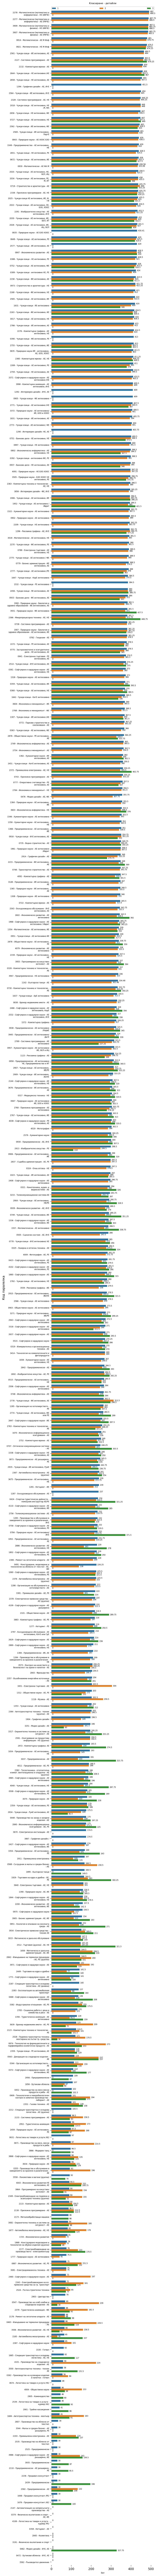

In [34]:
# Create a dictionary to map 'Код паралелка' to 'Паралелка' and "Училище"
code_to_paral_map = dict(klasirane_2022_combined[['Код паралелка', 'Паралелка']].drop_duplicates().values)
code_to_uchilishte_map = dict(klasirane_2022_combined[['Код паралелка', 'Училище']].drop_duplicates().values)

# Create the barplot using Seaborn
fig, ax = plt.subplots(figsize=(6,150), dpi=200)
code_to_paral_map = dict(zip(klasirane_2022_combined['Код паралелка'], klasirane_2022_combined['Паралелка']))

# Convert 'Код паралелка' to numeric positions for plotting
klasirane_2022_combined['Position'] = pd.factorize(klasirane_2022_combined['Код паралелка'])[0]
ax = sns.barplot(x='Мин_бал_м', y='Код паралелка', hue='Класиране', data=klasirane_2022_combined, errorbar=None)

# Get unique 'Код паралелка' values and corresponding 'Паралелка' labels
ytick_positions = klasirane_2022_combined['Position'].unique()
ytick_labels = [f"{code} - {code_to_paral_map[code]}" for code in klasirane_2022_combined['Код паралелка'].unique()]
ytick_labels = [textwrap.fill(label, 40) for label in ytick_labels]
plt.yticks(ytick_positions, ytick_labels, fontsize=6)

# Remove the temporary 'Position' column
klasirane_2022_combined.drop('Position', axis=1, inplace=True)

# Add labels, title, legend
plt.xlabel('Бал', fontsize=6)
plt.title('Класиране - детайли', pad=20, fontsize=8)
plt.legend(bbox_to_anchor=(0., 1, 1., .102), loc='lower left', ncols=5, mode="expand", borderaxespad=0., fontsize=6)
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=6, padding=3)

# Remove the frame of the plot
sns.despine(left=True, bottom=True)


In [24]:
# import pandas as pd
# import plotly.graph_objects as go

# # Sample DataFrame (replace this with your actual DataFrame)
# data = {
#     'Код паралелка': [101, 102, 103, 101, 104],
#     'Паралелка': ['A', 'B', 'C', 'A', 'D'],
#     'Училище': ['School1', 'School2', 'School1', 'School3', 'School4'],
#     'Мин_бал_м': [70, 80, 60, 85, 75],
#     'Класиране': [1, 2, 3, 4, 5]
# }

# klasirane_2022_combined = pd.DataFrame(data)

# # Create a dictionary to map 'Код паралелка' to 'Паралелка'
# code_to_paral_map = dict(klasirane_2022_combined[['Код паралелка', 'Паралелка']].drop_duplicates().values)

# # Convert 'Код паралелка' to numeric positions for plotting
# klasirane_2022_combined['Position'] = pd.factorize(klasirane_2022_combined['Код паралелка'])[0]

# # Get unique 'Код паралелка' values and corresponding 'Паралелка' labels
# ytick_positions = klasirane_2022_combined['Position'].unique()
# ytick_labels = [f"{code} - {code_to_paral_map[code]}" for code in klasirane_2022_combined['Код паралелка'].unique()]
# ytick_labels = [textwrap.fill(label, 40) for label in ytick_labels]

# # Create the bar plot using Plotly
# fig = go.Figure()

# colors = ['rgb(44, 160, 44)', 'rgb(31, 119, 180)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 'rgb(140, 86, 75)']

# for klasirane, group_df in klasirane_2022_combined.groupby('Класиране'):
#     fig.add_trace(go.Bar(
#         x=group_df['Мин_бал_м'],
#         y=group_df['Position'],
#         orientation='h',
#         name=f"Класиране {klasirane}",
#         text=group_df['Мин_бал_м'],
#         texttemplate="%{text}",
#         hoverinfo='text',
#         marker_color=colors[klasirane - 1],
#         error_x=dict(visible=False),
#         offsetgroup=klasirane,
#         marker_line_width=2,  # Adjust the width of the bar borders
#     ))

# # Set y-axis ticks and labels
# fig.update_layout(yaxis=dict(tickvals=ytick_positions, ticktext=ytick_labels, tickfont=dict(size=6)))

# # Add labels, title, and legend
# fig.update_layout(
#     xaxis_title='Бал',
#     title='Класиране - детайли',
#     legend=dict(x=1.02, y=1.02, orientation='v', font=dict(size=6)),
#     legend_title_text='Класиране',
#     barmode='group',
#     bargap=.1,         # Adjust the spacing between the grouped bars
#     bargroupgap=0.3,    # Adjust the spacing between groups
# )

# # Customize bar labels
# fig.update_traces(textposition='outside', textfont=dict(size=6, color='black'))

# # Update layout
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=300,
#     margin=dict(l=50, r=50, b=30, t=80),
#     plot_bgcolor='rgba(0,0,0,0)',
#     showlegend=True,
#     legend_traceorder='normal',
# )

# # Show the plot
# fig.show()


In [22]:
klasirane_2023_combined = pd.concat([klasirane_2023_1_clean, klasirane_2023_2_clean], axis=0)

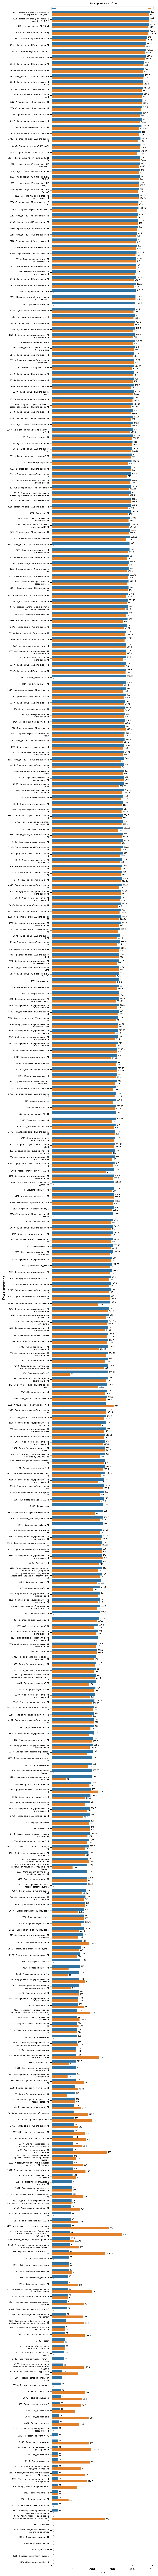

In [23]:
# Create a dictionary to map 'Код паралелка' to 'Паралелка'
# code_to_paral_map = dict(klasirane_2023_combined[['Код паралелка', 'Паралелка']].drop_duplicates().values)
# code_to_uchilishte_map = dict(klasirane_2023_combined[['Код паралелка', 'Училище']].drop_duplicates().values)

# Create the barplot using Seaborn
fig, ax = plt.subplots(figsize=(6,150), dpi=200)
code_to_paral_map = dict(zip(klasirane_2023_combined['Код паралелка'], klasirane_2023_combined['Паралелка']))
code_to_uchilishte_map = dict(zip(klasirane_2023_combined['Код паралелка'], klasirane_2023_combined['Училище']))

# Convert 'Код паралелка' to numeric positions for plotting
klasirane_2023_combined['Position'] = pd.factorize(klasirane_2023_combined['Код паралелка'])[0]
ax = sns.barplot(x='Мин_бал_м', y='Код паралелка', hue='Класиране', data=klasirane_2023_combined, errorbar=None)

# Get unique 'Код паралелка' values and corresponding 'Паралелка' labels
ytick_positions = klasirane_2023_combined['Position'].unique()
ytick_labels = [f"{code} - {code_to_paral_map[code]}" for code in klasirane_2023_combined['Код паралелка'].unique()]
ytick_labels = [textwrap.fill(label, 40) for label in ytick_labels]
y_annotation = [f"{code_to_uchilishte_map[code]}" for code in klasirane_2023_combined['Код паралелка'].unique()]

# Function to add custom annotations to the y-tick labels
def annotate_yticks(value, pos):
    return f'{y_annotation}'

plt.yticks(ytick_positions, ytick_labels, fontsize=6)

# Use FuncFormatter to set custom annotations for y-tick labels
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(annotate_yticks))

# Remove the temporary 'Position' column
klasirane_2023_combined.drop('Position', axis=1, inplace=True)

# Add labels, title, legend
plt.xlabel('Бал', fontsize=6)
plt.title('Класиране - детайли', pad=20, fontsize=8)
plt.legend(bbox_to_anchor=(0., 1, 1., .102), loc='lower left', ncols=5, mode="expand", borderaxespad=0., fontsize=6)
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=6, padding=3)

# Remove the frame of the plot
sns.despine(left=True, bottom=True)



# # Get y-tick positions and labels
# ytick_positions, ytick_labels = plt.yticks()


